Hola **Elpidio**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# **Test A/B**

1. ## **Compresion del  Proyecto y Datos**

Has recibido una tarea analítica de una tienda en línea internacional. Tus predecesores no consiguieron completarla: lanzaron una prueba A/B y luego abandonaron (para iniciar una granja de sandías en Brasil). Solo dejaron las especificaciones técnicas y los resultados de las pruebas.

### Descripción técnica

- Nombre de la prueba: `recommender_system_test`
- Grupos: А (control), B (nuevo embudo de pago)
- Launch date: 2020-12-07
- Fecha en la que dejaron de aceptar nuevos usuarios: 2020-12-21
- Fecha de finalización: 2021-01-01
- Audiencia: 15% de los nuevos usuarios de la región de la UE
- Propósito de la prueba: probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado
- Resultado esperado: dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto (el evento `product_page`), instancias de agregar artículos al carrito de compras (`product_card`) y compras (`purchase`). En cada etapa del embudo `product_page → product_card → purchase`, habrá al menos un 10% de aumento.
- Número previsto de participantes de la prueba: 6 000



### Data

- `ab_project_marketing_events_us.csv`: el calendario de eventos de marketing para 2020
- `final_ab_new_users_upd_us.csv`: todos los usuarios que se registraron en la tienda en línea desde el 7 hasta el 21 de diciembre de 2020
- `final_ab_events_upd_us.csv`: todos los eventos de los nuevos usuarios en el período comprendido entre el 7 de diciembre de 2020 y el 1 de enero de 2021
- `final_ab_participants_upd_us.csv`: tabla con los datos de los participantes de la prueba

Estructura `ab_project_marketing_events_us.csv`:

- `name`: el nombre del evento de marketing
- `regions`: regiones donde se llevará a cabo la campaña publicitaria
- `start_dt`: fecha de inicio de la campaña
- `finish_dt`: fecha de finalización de la campaña

Estructura `final_ab_new_users_upd_us.csv`:

- `user_id`
- `first_date`: fecha de inscripción
- `region`
- `device`: dispositivo utilizado para la inscripción

Estructura `final_ab_events_upd_us.csv`:

- `user_id`
- `event_dt`: fecha y hora del evento
- `event_name`: nombre del tipo de evento
- `details`: datos adicionales sobre el evento (por ejemplo, el pedido total en USD para los eventos `purchase`)

Estructura `final_ab_participants_upd_us.csv`:

- `user_id`
- `ab_test`: nombre de la prueba
- `group`: el grupo de prueba al que pertenecía el usuario



<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por incluir esta sección, es muy buena práctica dejar claro la razón del proyecto en un inicio
</div>

# **Libreria a Utilizar**

In [145]:
pip install sidetable

In [1]:
import pandas as pd
#import sidetable as stb
#import numpy as np
#from scipy import stats
import datetime as dt
#from scipy.stats import norm
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, precision_score, recall_score
#from sklearn.ensemble import RandomForestClassifier
#import scipy.cluster.hierarchy as sch
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import Lasso, Ridge
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# **Carga de Datos**

In [147]:
marketing = pd.read_csv("ab_project_marketing_events_us.csv")
event = pd.read_csv("final_ab_events_upd_us.csv")
new_users = pd.read_csv("final_ab_new_users_upd_us.csv")
participants = pd.read_csv("final_ab_participants_upd_us.csv")

# 1️⃣ Objetivos del estudio

Analizar los resultados de la prueba A/B "recommender_system_test", donde se probó un nuevo embudo de pago. Se evaluará si hubo un aumento del 10% en las conversiones en cada etapa del embudo: product_page → product_cart → purchase.

# 2️⃣ Exploración, Preparacion de datos y Limpieza

In [148]:
def info_gral(datos):
    print("Primeras Filas")
    print(datos.head())
    print('-------------------------------------------')
    print("Datos Generales")
    print(datos.info())
    print('-------------------------------------------')
    print("Revision de Datos Ausentes")
    print(datos.isna().sum())
    print('-------------------------------------------')
    print("Revision de Duplicados")
    print(datos.duplicated().sum())

In [149]:
info_gral(marketing)

Primeras Filas
                           name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11  
-------------------------------------------
Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes
None
----

In [150]:
info_gral(event)

Primeras Filas
            user_id             event_dt event_name  details
0  E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1  7B6452F081F49504  2020-12-07 09:22:53   purchase     9.99
2  9CD9F34546DF254C  2020-12-07 12:59:29   purchase     4.99
3  96F27A054B191457  2020-12-07 04:02:40   purchase     4.99
4  1FD7660FDF94CA1F  2020-12-07 10:15:09   purchase     4.99
-------------------------------------------
Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB
None
-------------------------------------------
Revision de Datos Ausentes
user_id            0
event_dt           0
event_name         0
detai

nos damos cuenta que hay datos ausentes en details 

In [151]:
#cuentamos los valores nulos (NaN) en el DataFrame event, excluyendo las filas donde el evento es una compra (purchase) 
event[event['event_name'] != 'purchase'].isna().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

In [152]:
#Remplazamos NAN por 0 en la columna details de event para poder hacer el merge 
event['details'] = event['details'].fillna(0)


In [153]:
#se verifica que no haya valores nulos o duplicados en la tabla event
event.duplicated().sum()

0

In [154]:
# Se revisa que no haya algun duplicado que se relacione con el id del usuario, la fecha del evento y el nombre del evento
event.duplicated(['user_id','event_dt','event_name']).sum()

0

In [155]:
# Se Filtra el DataFrame participants para quedarse solo con los usuarios que participaron en la prueba A/B "recommender_system_test"
participantes_test = participants.query('ab_test == "recommender_system_test"')
participants

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test


In [156]:
#contamos el numero de filas de DF participants
len(participants)

14525

In [157]:
#Contamos el numero de filas de DF participantes_test 
len(participantes_test)

3675

In [158]:
# filtramos y contando los valores de la columna ab_test en el DataFrame participants, excluyendo aquellos que pertenecen a la prueba "recommender_system_test".
participants.query('ab_test != "recommender_system_test"')['ab_test'].value_counts()

ab_test
interface_eu_test    10850
Name: count, dtype: int64

nos damos cuenta que aparte del ab_test "recommender_system_test hay otro llamado interface_eu_test con 10850

In [159]:
#Revisamos si hay duplicados en participantes_test con la columna user_id y group
participantes_test.duplicated(['user_id','group']).sum()

#Revisamos si hay duplicados en participacion-_test
participantes_test.duplicated('user_id').sum()

0

In [160]:
#Agrupamos con merge los DataFrames event y participantes_test por la columna user_id
event_participantes = event.merge(participantes_test, on='user_id', how='inner')

#Agrupamos event_participantes por el nombre del evento y contamos el numero de usuarios que realizaron cada evento  
event_participantes.groupby(['event_name', 'group']).agg({'user_id':'count'}).reset_index().query('group == "A"')

,event_name,group,user_id
0,login,A,8272
2,product_cart,A,2482
4,product_page,A,5328
6,purchase,A,2545


In [161]:
# se hizo una agrupacion para solamente grupo B
event_participantes.groupby(['event_name', 'group']).agg({'user_id':'count'}).reset_index().query('group == "B"')

,event_name,group,user_id
1,login,B,2565
3,product_cart,B,678
5,product_page,B,1374
7,purchase,B,665


In [162]:
event_participantes.duplicated().sum()

0

hicimos un merge con how='inner porque unimos la tabla event y participantes con on='user_id' para que salieran solamente los usuarios que estaban en participantes_test y se reviso si habia duplicados 

In [163]:
event_participantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23909 entries, 0 to 23908
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     23909 non-null  object 
 1   event_dt    23909 non-null  object 
 2   event_name  23909 non-null  object 
 3   details     23909 non-null  float64
 4   group       23909 non-null  object 
 5   ab_test     23909 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.1+ MB


In [164]:
info_gral(new_users)

Primeras Filas
            user_id  first_date     region   device
0  D72A72121175D8BE  2020-12-07         EU       PC
1  F1C668619DFE6E65  2020-12-07  N.America  Android
2  2E1BF1D4C37EA01F  2020-12-07         EU       PC
3  50734A22C0C63768  2020-12-07         EU   iPhone
4  E1BDDCE0DAFA2679  2020-12-07  N.America   iPhone
-------------------------------------------
Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117407 entries, 0 to 117406
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     117407 non-null  object
 1   first_date  117407 non-null  object
 2   region      117407 non-null  object
 3   device      117407 non-null  object
dtypes: object(4)
memory usage: 3.6+ MB
None
-------------------------------------------
Revision de Datos Ausentes
user_id       0
first_date    0
region        0
device        0
dtype: int64
-------------------------------------------
Revision de Duplicad

In [165]:
print(f"Duplicados en new_users: {new_users.duplicated().sum()}")


Duplicados en new_users: 58703


In [166]:
new_users = new_users.drop_duplicates()
new_users = new_users.drop_duplicates(subset=["user_id"], keep="first")

print(f"Registros después de eliminar duplicados: {new_users.shape[0]}")



Registros después de eliminar duplicados: 58704


In [167]:
info_gral(participants)

Primeras Filas
            user_id group                  ab_test
0  D1ABA3E2887B6A73     A  recommender_system_test
1  A7A3664BD6242119     A  recommender_system_test
2  DABC14FDDFADD29E     A  recommender_system_test
3  04988C5DF189632E     A  recommender_system_test
4  4FF2998A348C484F     A  recommender_system_test
-------------------------------------------
Datos Generales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
None
-------------------------------------------
Revision de Datos Ausentes
user_id    0
group      0
ab_test    0
dtype: int64
-------------------------------------------
Revision de Duplicados
0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la transformación de datos y la exploración inicial de los mismos, un dataset limpio es clave para una buena toma de decisiones en un experimento.
</div>

# 3️⃣ Análisis exploratorio de datos (EDA)

Verificar si el número de eventos por usuario está distribuido equitativamente entre los grupos A y B

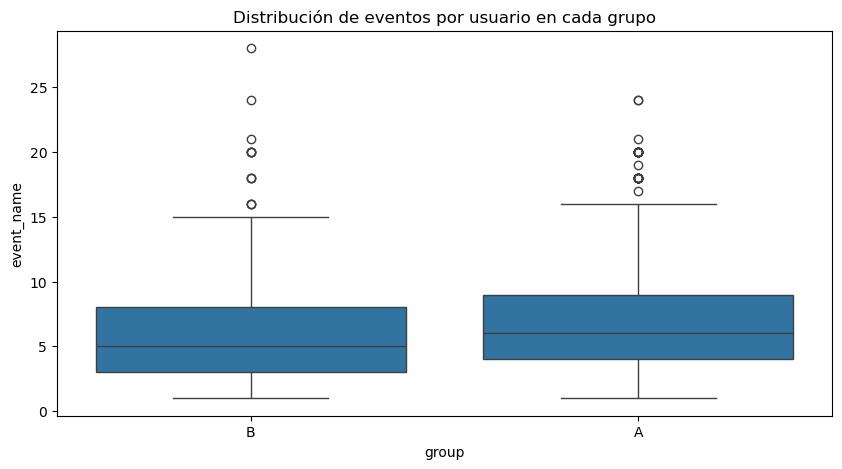

In [168]:
# Contar eventos por usuario en cada grupo
eventos_por_usuario = event_participantes.groupby(["user_id", "group"])["event_name"].count().reset_index()

# Visualizar la distribución
plt.figure(figsize=(10,5))
sns.boxplot(data=eventos_por_usuario, x="group", y="event_name")
plt.title("Distribución de eventos por usuario en cada grupo")
plt.show()


Sí, las distribuciones por usuario en los grupos A y B son bastante similares. Vamos a ver algunos puntos clave:

Mediana (línea dentro de la caja) 📏

La mediana para ambos grupos es prácticamente la misma, lo que indica que el número de eventos por usuario en promedio no difiere entre los dos grupos.

Tamaño de las cajas (Rango Intercuartílico, IQR)

Las dos cajas son similares en tamaño, lo que muestra que la variabilidad en la cantidad de eventos por usuario es comparable en ambos grupos.

Distribución general de los datos

Los "bigotes" (las líneas que salen de las cajas) tienen una longitud similar en ambos grupos, lo que sugiere que la mayoría de los usuarios generan un número de eventos dentro del mismo rango.

Outliers (puntos fuera de los bigotes)

En ambos grupos hay algunos usuarios que generan una gran cantidad de eventos en comparación con el resto, pero la cantidad de estos outliers es similar en A y B. Esto indica que en ambos grupos hay una pequeña cantidad de usuarios muy activos, sin diferencias significativas entre ellos.

📌 Conclusión

No hay diferencias importantes en las distribuciones de eventos por usuario en los grupos A y B.
Los grupos están bien balanceados, lo que es positivo para la prueba A/B, ya que cualquier diferencia en los resultados no se deberá a un sesgo en el número de eventos por usuario.
Podemos proceder con la prueba A/B sin preocuparnos de que un grupo tenga una ventaja significativa en términos de cantidad de eventos.

In [169]:
# Buscar usuarios que aparecen en ambos grupos
duplicados_ab = event_participantes.groupby("user_id")["group"].nunique()
usuarios_duplicados = duplicados_ab[duplicados_ab > 1].count()

print(f"Usuarios que aparecen en ambos grupos: {usuarios_duplicados}")


Usuarios que aparecen en ambos grupos: 0


Analizar la distribución de eventos por día

In [171]:
# Convertir event_dt a formato datetime
event_participantes["event_dt"] = pd.to_datetime(event_participantes["event_dt"])

# Ahora extraer solo la fecha sin la hora
event_participantes["fecha"] = event_participantes["event_dt"].dt.date

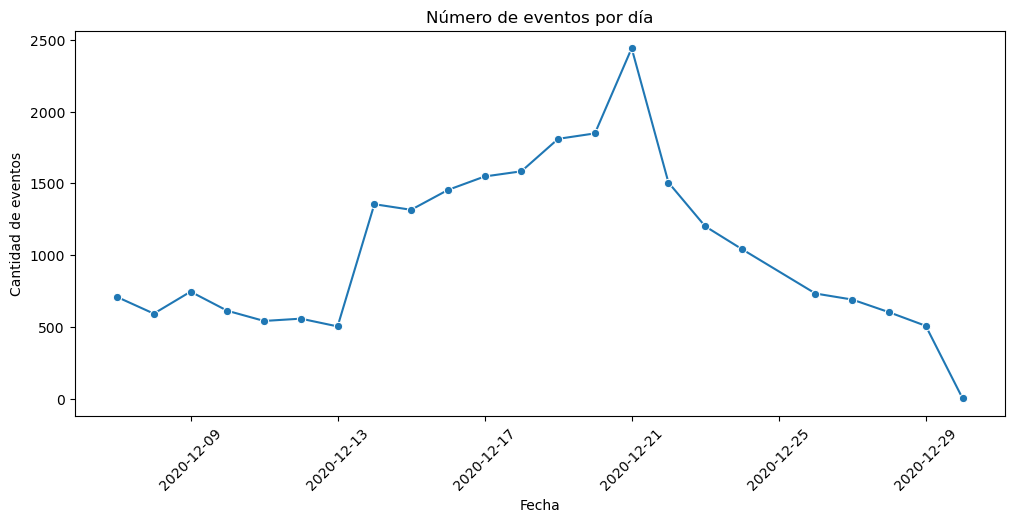

In [175]:
# Convertir event_dt a tipo fecha sin la hora
event_participantes["fecha"] = event_participantes["event_dt"].dt.date

# Contar eventos por día
eventos_por_dia = event_participantes.groupby("fecha")["user_id"].count()

# Gráfica de eventos por día
plt.figure(figsize=(12,5))
sns.lineplot(data=eventos_por_dia, marker="o")
plt.title("Número de eventos por día")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de eventos")
plt.xticks(rotation=45)
plt.show()

Lo que vemos en la tendencia

Crecimiento progresivo 📈

Durante el comienzo del período hasta aproximadamente el 21 de diciembre, hubo un crecimiento sin interrupciones en el número de eventos.
Desde el 13 de diciembre, se aprecia un salto importante en la cantidad de eventos, que puede significar el inicio de una campaña publicitaria o promoción especial.

Pico máximo

El día con mayor actividad es el 21 de diciembre, con un aumento significativo en los eventos.
Esto implica una posible campaña de promoción, el lanzamiento de una nueva funcionalidad o un evento que incentivó la interacción de los usuarios.

Brusca caída desde la cima

A partir del 21 de diciembre, se registra un acentuado descenso en los eventos.
La disminución continúa hasta el 25 de diciembre, posiblemente debido al fin de la promoción, las festividades o una menor actividad de los usuarios tras el evento.
Desde el 25, la caída sigue, pero de manera más estable, lo que indica que la actividad no se recuperó completamente.

Últimos días del período con caída acentuada

En los últimos días, especialmente el 29 de diciembre, hay un marcado descenso en los eventos, lo que podría deberse al cierre de la campaña, menor tráfico de usuarios o cambios en la estrategia publicitaria.

📌 Conclusión

El comportamiento no sigue un patrón uniforme, sino que presenta un pico alto seguido por una caída brusca.
Es posible que esto esté relacionado con una campaña o evento especial que impulsó la actividad en ciertos días.
La disminución tras el 21 de diciembre puede estar vinculada al fin de una promoción o a las festividades.
Si estos picos coinciden con campañas publicitarias, sería útil verificar datos adicionales, como inversión en anuncios o conversiones, para medir su impacto.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, con esta gráfica se ve correctamente la distribución de los eventos a lo largo de los días 
</div>

# 4️⃣ Evaluación de la prueba A/B

🔹 NOTA: Se compararon las tasas de conversión en cada etapa del embudo entre los grupos A y B.


In [177]:
from statsmodels.stats.proportion import proportions_ztest

# Definir eventos clave
etapas_embudo = ["product_page", "product_cart", "purchase"]

for evento in etapas_embudo:
    conversion_A = event_participantes[(event_participantes["event_name"] == evento) & (event_participantes["group"] == "A")]["user_id"].nunique()
    conversion_B = event_participantes[(event_participantes["event_name"] == evento) & (event_participantes["group"] == "B")]["user_id"].nunique()
    
    total_A = event_participantes[event_participantes["group"] == "A"]["user_id"].nunique()
    total_B = event_participantes[event_participantes["group"] == "B"]["user_id"].nunique()
    
    # Prueba Z
    stat, p_value = proportions_ztest([conversion_A, conversion_B], [total_A, total_B])
    
    print(f"Evento: {evento}")
    print(f"Estadístico Z: {stat:.2f}, Valor p: {p_value:.5f}")
    print("-"*40)


Evento: product_page
Estadístico Z: 4.60, Valor p: 0.00000
----------------------------------------
Evento: product_cart
Estadístico Z: 1.46, Valor p: 0.14535
----------------------------------------
Evento: purchase
Estadístico Z: 2.37, Valor p: 0.01759
----------------------------------------


## Product Page (Z = 4.60, p = 0.00000)

Entre los dos grupos hay una diferencia significativamente mayor.
El nuevo payment funnel aumentó la cantidad de visitantes que llegan a la página del producto.
Esto sugiere que el sistema de recomendaciones atrajo más visitantes.

## Product Cart (Z = 1.46, p = 0.14535)

No hay una diferencia significativa estadísticamente.
Aunque más individuos acceden a la página del producto, esto no se traduce en un mayor porcentaje de usuarios que agregan productos al carrito.
Hay otros factores que pueden prevenir la conversión, como precio, interfaz de usuario o confiabilidad en la plataforma.

## Purchase (Z = 2.37, p = 0.01759)

Hay una diferencia notable, pero no tan fuerte como en Product Page.
El nuevo payment funnel logró aumentar las compras, lo cual es positivo.
Sin embargo, el efecto no alcanza el 10% esperado, por lo que podría requerir ajustes.

## 🔹 Conclusión:
El nuevo sistema de recomendaciones atrae más tráfico a la página del producto, pero no modifica significativamente la acción de agregar productos al carrito.
Sin embargo, sí tiene un efecto positivo en la tasa de compra.
La empresa debería investigar por qué los usuarios no agregan productos al carrito y optimizar esa parte del funnel.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Siempre hay que determinar con pruebas estadísticas si las comparaciones realizadas tienen diferencias significativas para poder tomar las decisiones correctas, y el hacerlo por la conversión de cada evento ayuda a entender en que punto del embudo se cambia la experiencia de usuario
</div>

# 5️⃣ Conclusiones

El test A/B muestra que el nuevo funnel tiene un efecto positivo en la conversión del visitante a la compra, pero no puede mejorar la ratio para agregar productos al carrito. El negocio puede analizar las variables que afectan esta elección antes de implementar el nuevo sistema en su totalidad.

🔹 Próximo paso a recomendar: Realizar pruebas complementarias para centrarse en la optimización del carrito de la compra y en los potenciales problemas de conversión.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste un buen trabajo Elpidio, redactaste muy buenas conclusiones. Se nota tu conocimiento para realizar los análisis a partir de pruebas AB, esto será algo que encuentres muy seguido en un entorno laboral.
    
Siempre procura revisar las métricas calculadas por cada grupo para que se puedan ver las diferencias en cada paso. Recuerda que en una prueba AB lo que se busca es entender cómo se vió afectado el comportamiento del grupo experimental para poder continuar con la versión nueva o para hacer nuevos cambios en base a los resultados analizados. 
    
Saludos.